In [1]:
from google.oauth2 import service_account
import pandas as pd
import gspread
import json
import os
from dotenv import load_dotenv
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import textwrap
import google.generativeai as genai
from IPython.display import Markdown
from PIL import Image
from io import BytesIO

In [2]:
#Import the json data
load_dotenv()
google_json = os.getenv('GOOGLE_JSON')

In [3]:
service_account_info = json.loads(google_json)
credentials = service_account.Credentials.from_service_account_info(service_account_info)

In [4]:
scope = ['https://spreadsheets.google.com/feeds','https://www.googleapis.com/auth/drive']
creds_with_scope = credentials.with_scopes(scope)

In [5]:
client = gspread.authorize(creds_with_scope)

In [6]:
spreadsheet = client.open_by_url(os.getenv('GOOGLE_SHEET'))

In [7]:
worksheet = spreadsheet.get_worksheet(0)

In [8]:
records_data = worksheet.get_all_records()

In [9]:
records_df = pd.DataFrame.from_dict(records_data)

In [10]:
records_df['K/D Ratio'] = round(records_df.Kills / records_df.Deaths, 1)
records_df

,Date time,Kills,Deaths,Accuracy,Shots Fired,Shots Hit,Damage Dealt,Damage Taken,Notes,K/D Ratio
0,23/02/2024 15:40,26,10,49.65,441,219,9206,5252,,2.6
1,23/02/2024 16:17,23,11,48.8,420,205,8463,4917,,2.1
2,23/02/2024 16:35,22,14,45.33,450,204,7646,5493,,1.6
3,23/02/2024 16:50,25,15,42.6,399,170,7566,5231,,1.7
4,23/02/2024 17:13,28,14,44.26,436,193,8615,5941,,2.0
5,23/02/2024 23:17,66,20,43.1,740,319,15396,8348,Changed to HCS:FFA,3.3
6,24/02/2024 18:09,61,25,42.73,681,291,13331,9140,First match of the day,2.4
7,24/02/2024 18:26,71,18,42.3,773,327,15292,8232,,3.9
8,24/02/2024 20:38,77,14,45.66,830,379,16861,7697,,5.5
9,25/02/2024 21:10,68,18,,,,,,Missing Data,3.8


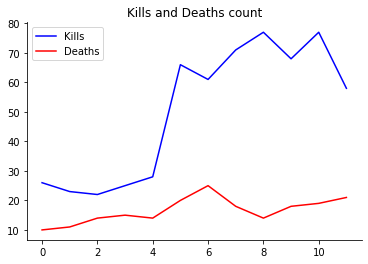

In [11]:
sns.lineplot(data=records_df, x=records_df.index, y='Kills', color='blue')
sns.lineplot(data=records_df, x=records_df.index, y='Deaths', color='red')
sns.despine(left=False, bottom=False)
plt.title('Kills and Deaths count')
plt.ylabel('')
plt.legend(['Kills', 'Deaths'])

In [12]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=records_df['Date time'], y=records_df['Kills'], mode='lines+markers', name='Kills', line=dict(color='#FF2A6D')))
fig.add_trace(go.Scatter(x=records_df['Date time'], y=records_df['Deaths'], mode='lines+markers', name='Deaths', line=dict(color='#05D9E8')))
fig.update_layout(title='Last Games', hovermode='x', plot_bgcolor='#01012B')

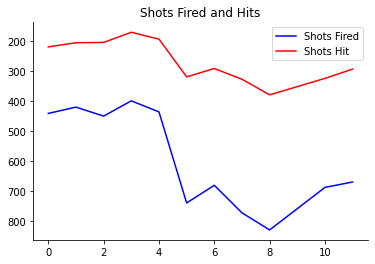

In [13]:
sns.lineplot(data=records_df, x=records_df.index, y='Shots Fired', color='blue')
sns.lineplot(data=records_df, x=records_df.index, y='Shots Hit', color='red')
sns.despine(left=False, bottom=False)
plt.title('Shots Fired and Hits')
plt.ylabel('')
plt.legend(['Shots Fired', 'Shots Hit'])

In [14]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=records_df['Date time'], y=records_df['Shots Fired'], mode='lines+markers', name='Shots Fired', line=dict(color='#FF2A6D')))
fig.add_trace(go.Scatter(x=records_df['Date time'], y=records_df['Shots Hit'], mode='lines+markers', name='Shots Hit', line=dict(color='#05D9E8')))
fig.update_layout(title='Shooting', hovermode='x', plot_bgcolor='#01012B')

Text(0, 0.5, '')

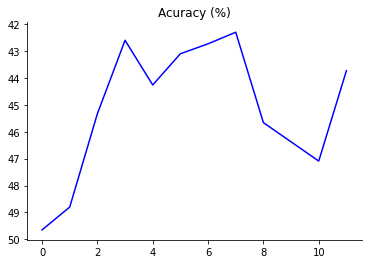

In [15]:
sns.lineplot(data=records_df, x=records_df.index, y='Accuracy', color='blue')
sns.despine(left=False, bottom=False)
plt.title('Acuracy (%)')
plt.ylabel('')

In [16]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=records_df['Date time'], y=records_df['Accuracy'], mode='lines+markers', name='Accuracy', line=dict(color='#FF2A6D')))
fig.update_layout(title='Accuracy (%)', hovermode='x', plot_bgcolor='#01012B')

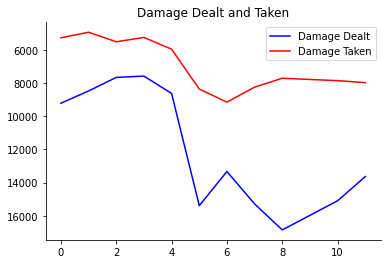

In [17]:
sns.lineplot(data=records_df, x=records_df.index, y='Damage Dealt', color='blue')
sns.lineplot(data=records_df, x=records_df.index, y='Damage Taken', color='red')
sns.despine(left=False, bottom=False)
plt.title('Damage Dealt and Taken')
plt.ylabel('')
plt.legend(['Damage Dealt', 'Damage Taken'])

In [18]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=records_df['Date time'], y=records_df['Damage Dealt'], mode='lines+markers', name='Damage Dealt', line=dict(color='#FF2A6D')))
fig.add_trace(go.Scatter(x=records_df['Date time'], y=records_df['Damage Taken'], mode='lines+markers', name='Damage Taken', line=dict(color='#05D9E8')))
fig.update_layout(title='Damage', hovermode='x', plot_bgcolor='#01012B')

Text(0, 0.5, '')

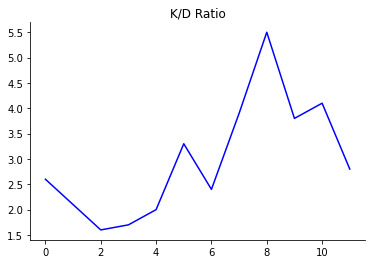

In [19]:
sns.lineplot(data=records_df, x=records_df.index, y='K/D Ratio', color='blue')
sns.despine(left=False, bottom=False)
plt.title('K/D Ratio')
plt.ylabel('')

In [20]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=records_df['Date time'], y=records_df['K/D Ratio'], mode='lines+markers', name='K/D Ratio', line=dict(color='#FF2A6D')))
fig.update_layout(title='K/D Ratio', hovermode='x', plot_bgcolor='#01012B')

In [21]:
def to_markdown(text):
    """Function to transform the text generated by AI to markdown

    Args:
        text (str): str text generated by AI

    Returns:
        Markdown: AI Text transformed to markdown
    """
    text = text.replace('•', '  *')
    return Markdown(textwrap.indent(text, '>', predicate=lambda _: True))

In [22]:
#Using API Key to connect with the AI
genai.configure(api_key=os.getenv('GOOGLE_AI_KEY'))

In [23]:
#Selecting the model
model = genai.GenerativeModel('gemini-pro')

In [24]:
response = model.generate_content(f"""
Use the following information: {records_df}, also consider that the training sessions used to generate the data are 8 bots against
and the player in a free for all match, following Halo Championship Series rules, and perform the following tasks:
1. Perform a general analysis of the data.
2. Extract the dates with the best and worst results.
3. Generate tips that can help the player improve their individually skills.
4. Considering the results obtained, is there any correlation between the data?
5. Can you assume what style of play the player uses and how could it improve individually?
6. How should the player reduce its negative stats without altering the individual playstyle assumed in point 5?
7. Based on point 6, What strategies can the player use within the game to overcome challenges and What resources are available outside the game that can help the player learn and grow?""")
to_markdown(response.text)

>1. **General Analysis:**
>   - The player recorded 11 matches.
>   - The player had an average K/D ratio of 2.9.
>   - The player's best match was on 24/02/2024 at 20:38 with a K/D ratio of 5.5.
>   - The player's worst match was on 23/02/2024 at 16:35 with a K/D ratio of 1.6.
>   - The player's average accuracy was 45.08%.
>
>2. **Dates with Best and Worst Results:**
>   - **Best Results:**
>     - 24/02/2024 at 20:38
>     - 25/02/2024 at 21:27
>     - 24/02/2024 at 18:26
>   - **Worst Results:**
>     - 23/02/2024 at 16:35
>     - 23/02/2024 at 16:50
>     - 23/02/2024 at 16:17
>
>3. **Tips to Improve Individual Skills:**
>   - Improve accuracy by aiming for the head and avoiding shots that are not likely to hit.
>   - Work on movement and positioning to avoid getting caught in the open and to make it harder for opponents to hit you.
>   - Use cover effectively to protect yourself from enemy fire.
>   - Communicate with teammates to coordinate attacks and support each other.
>
>4. **Correlation Between Data:**
>   - There is a positive correlation between accuracy and K/D ratio, meaning that players with higher accuracy tend to have higher K/D ratios.
>   - There is a negative correlation between deaths and K/D ratio, meaning that players with fewer deaths tend to have higher K/D ratios.
>
>5. **Assumed Playstyle and Improvement:**
>   - The player seems to be an aggressive player who likes to push forward and get into close combat.
>   - The player could improve their accuracy and movement to become a more effective fragger.
>   - The player could also work on their communication and coordination with teammates to become a better team player.
>
>6. **Reducing Negative Stats:**
>   - The player can reduce their deaths by playing more cautiously and by taking cover more often.
>   - The player can reduce their negative stats without altering their individual playstyle by improving their accuracy, movement, positioning, and communication.
>
>7. **Strategies to Overcome Challenges:**
>   - Within the game, the player can use grenades and power-ups to gain an advantage over opponents.
>   - The player can also use vehicles to move around the map quickly and to get the drop on enemies.
>   - Outside the game, the player can watch pro matches and tutorials to learn new strategies and techniques.
>   - The player can also join a competitive team or league to practice and improve their skills.

In [25]:
def last_matchs_plot(data):
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=data['Date time'], y=data['Kills'], mode='lines+markers', name='Kills', line=dict(color='#FF2A6D')))
    fig.add_trace(go.Scatter(x=data['Date time'], y=data['Deaths'], mode='lines+markers', name='Deaths', line=dict(color='#05D9E8')))
    fig.update_layout(title='Last Games', hovermode='x', plot_bgcolor='#01012B', width=1200, height=660)
    return fig

In [26]:
def kd_ratio_plot(data):
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=data['Date time'], y=data['K/D Ratio'], mode='lines+markers', name='K/D Ratio', line=dict(color='#FF2A6D')))
    fig.update_layout(title='K/D Ratio', hovermode='x', plot_bgcolor='#01012B', width=1200, height=660)
    return fig

In [27]:
def create_image_from_plot(plot):
   """
   Creates a PIL Image object from a plot object without using temporary files.

   Args:
       plot: The plot object to convert to an image.

   Returns:
       The PIL Image object representing the plot.
   """

   img_bytes = plot.to_image(format='png')
   img_data = BytesIO(img_bytes)
   img = Image.open(img_data)
   return img

plot = create_image_from_plot(kd_ratio_plot(records_df))

In [43]:
img_model = genai.GenerativeModel('gemini-pro-vision')
response = img_model.generate_content(["Use the plot and make an analysis about the data shown in it, using a videogame context, do not calculate averages to do the analysis", plot], stream=True)
response.resolve()
to_markdown(response.text)

> The data shown in the plot is about the K/D ratio of a player in a videogame. The K/D ratio is a measure of how many kills a player has gotten compared to how many times they have died. In this case, the player has gotten 2.5 kills for every time they have died.
>
>The plot shows that the player's K/D ratio has been going up and down over time. There are a few possible explanations for this. One possibility is that the player is simply getting better at the game. Another possibility is that the player is playing against easier opponents. A third possibility is that the player is using different strategies or weapons that are more effective.
>
>Overall, the data shown in the plot is a good indicator of how well the player is doing in the game. A high K/D ratio means that the player is getting more kills than they are dying, which is a good sign. However, it is important to note that the K/D ratio is not the only measure of how well a player is doing. Other factors, such as teamwork and objective play, are also important.